In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('NFLX.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [42]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

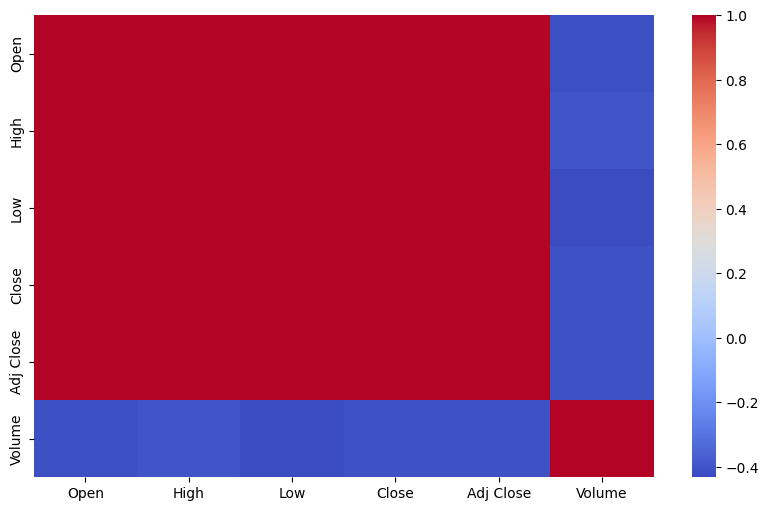

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.drop('Date',axis=1).corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=False,cmap='coolwarm')
plt.show()

In [3]:
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df['Date']

0      2018-02-05
1      2018-02-06
2      2018-02-07
3      2018-02-08
4      2018-02-09
          ...    
1004   2022-01-31
1005   2022-02-01
1006   2022-02-02
1007   2022-02-03
1008   2022-02-04
Name: Date, Length: 1009, dtype: datetime64[ns]

C:\Users\Viswanath Anand\AppData\Local\Temp\ipykernel_12884\4265888436.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


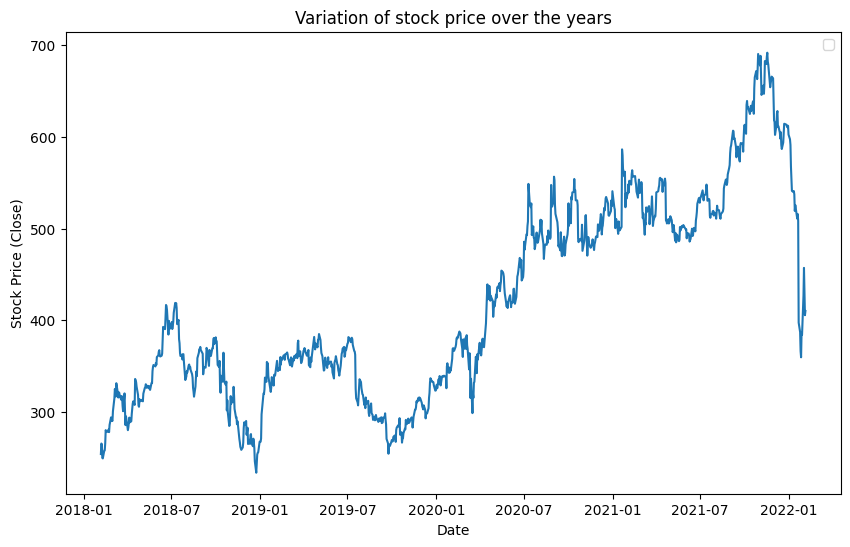

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(df['Date'],df['Close'])
plt.xlabel('Date')
plt.ylabel('Stock Price (Close)')
plt.title('Variation of stock price over the years')
plt.legend()

In [14]:
X = df[['Open','High','Low','Close','Volume']].values
y = df['Close'].values

In [ ]:
y = y.reshape((len(y),1)) # Reshaping into a 2D array

In [18]:
y

array([[254.259995],
       [265.720001],
       [264.559998],
       ...,
       [429.480011],
       [405.600006],
       [410.170013]], shape=(1009, 1))

In [ ]:
# Scaling the features and the target variable
from sklearn.preprocessing import StandardScaler
sc_features = StandardScaler()
sc_target = StandardScaler()
X = sc_features.fit_transform(X)
y = sc_target.fit_transform(y)

In [20]:
X_train,y_train = [],[]
time_steps = 60
for i in range(time_steps,len(X)):
    X_train.append(X[i-time_steps:i])
    y_train.append(y[i,0])

In [21]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [24]:
X = X_train
y = y_train

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout

model = Sequential([
    LSTM(units=64,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2])),
    LSTM(units=64,return_sequences=False),
    Dropout(0.2),
    Dense(units=1)
])

model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_absolute_error'])

c:\Users\Viswanath Anand\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
model.fit(X_train,y_train,epochs=30,batch_size=32,validation_data=(X_train,y_train))

Epoch 1/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - loss: 0.2750 - mean_absolute_error: 0.3796 - val_loss: 0.0924 - val_mean_absolute_error: 0.2214
Epoch 2/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0726 - mean_absolute_error: 0.1980 - val_loss: 0.0452 - val_mean_absolute_error: 0.1538
Epoch 3/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0515 - mean_absolute_error: 0.1661 - val_loss: 0.0383 - val_mean_absolute_error: 0.1388
Epoch 4/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0464 - mean_absolute_error: 0.1544 - val_loss: 0.0345 - val_mean_absolute_error: 0.1315
Epoch 5/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0412 - mean_absolute_error: 0.1474 - val_loss: 0.0329 - val_mean_absolute_error: 0.1284
Epoch 6/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0395 - mean_absolute_error: 0.1442 - val_loss: 0.0305 - val_mean_absolute_error: 0.1238
Epoch 7/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0371 - mean_absolute_error: 0.1370 - val_loss

In [36]:
y_pred = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step


In [37]:
y_pred = sc_target.inverse_transform(y_pred)
y_acutal = sc_target.inverse_transform(y_test.reshape(-1,1))

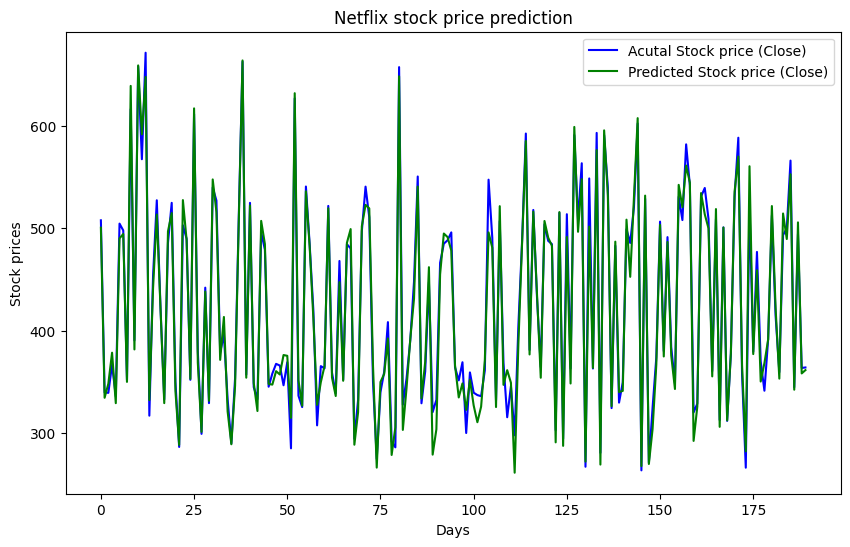

In [38]:
plt.figure(figsize=(10,6))
plt.plot(y_acutal,label='Acutal Stock price (Close)',color='blue')
plt.plot(y_pred,label='Predicted Stock price (Close)',color='green')
plt.xlabel('Days')
plt.ylabel('Stock prices')
plt.title('Netflix stock price prediction')
plt.legend()
plt.show()

In [39]:
from sklearn.metrics import r2_score
r2_score(y_acutal,y_pred)

0.9795589451654353

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming y_actual and y_pred are numpy arrays (already inverse_transformed if you scaled data)
mae = mean_absolute_error(y_acutal, y_pred)
rmse = np.sqrt(mean_squared_error(y_acutal, y_pred))

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 10.700629947954356
RMSE: 14.241414317151495


Epoch 1/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0214 - mean_absolute_error: 0.1073 - val_loss: 0.0167 - val_mean_absolute_error: 0.0956
Epoch 2/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0205 - mean_absolute_error: 0.1061 - val_loss: 0.0183 - val_mean_absolute_error: 0.1045
Epoch 3/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0206 - mean_absolute_error: 0.1058 - val_loss: 0.0214 - val_mean_absolute_error: 0.1116
Epoch 4/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0209 - mean_absolute_error: 0.1074 - val_loss: 0.0157 - val_mean_absolute_error: 0.0933
Epoch 5/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0198 - mean_absolute_error: 0.1044 - val_loss: 0.0151 - val_mean_absolute_error: 0.0921
Epoch 6/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0211 - mean_absolute_error: 0.1080 - val_loss: 0.0152 - val_mean_absolute_error: 0.0920
Epoch 7/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0199 - mean_absolute_error: 0.1023 - val_loss

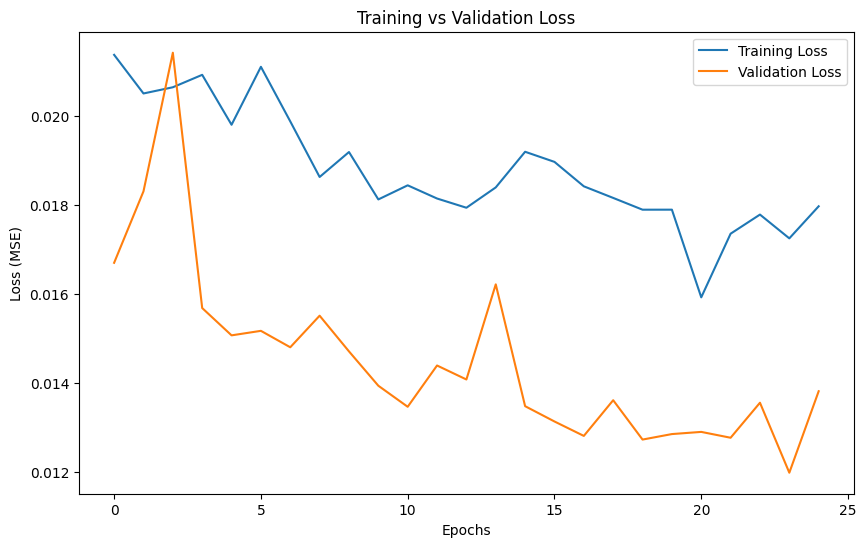

In [41]:
history = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=25,
    validation_data=(X_test, y_test),
    verbose=1
)

# Plot training vs validation loss
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()